In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={"figure.figsize": (20, 7), "lines.linewidth": 2.5}, font_scale=1.5)
sns.set_style("whitegrid")
np.random.seed(0)

end_string = '\n' + '--'*25 + '\n'

In [2]:
hd = pd.read_csv('data/train_data.csv') # heart disease
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
BP               1000 non-null float64
smoking          1000 non-null float64
cholesterol      1000 non-null float64
behavior         1000 non-null float64
BMI              1000 non-null float64
alcohol          1000 non-null float64
age              1000 non-null float64
old_assay        1000 non-null float64
gold_standard    1000 non-null float64
assay            1000 non-null float64
Status           1000 non-null int64
Id               1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [3]:
hd.describe()

,BP,smoking,cholesterol,behavior,BMI,alcohol,age,old_assay,gold_standard,assay,Status,Id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.003872,-0.002993,0.015333,-0.059560,0.026501,-0.021142,0.037165,-0.025571,-0.000949,-0.007187,0.579000,500.500000
std,1.018697,0.995018,1.052871,1.021748,1.048515,1.028742,1.009304,1.018307,0.988997,0.982803,0.493967,288.819436
min,-3.491280,-2.743942,-3.593476,-2.915211,-2.985605,-3.399287,-3.030942,-2.773721,-3.007064,-2.585948,0.000000,1.000000
25%,-0.720057,-0.640863,-0.701538,-0.760090,-0.661508,-0.701004,-0.640180,-0.722317,-0.711722,-0.708690,0.000000,250.750000
50%,0.015178,0.007635,-0.004525,-0.040594,-0.037692,0.025998,0.072287,-0.056287,-0.051619,-0.035600,1.000000,500.500000
75%,0.696036,0.617677,0.747173,0.583444,0.730616,0.687024,0.700758,0.698496,0.685679,0.652220,1.000000,750.250000
max,3.666298,2.577513,3.546048,2.967365,3.821129,3.026921,3.805555,3.247953,3.727961,3.149023,1.000000,1000.000000


In [4]:
a = hd['BP']
a.shape

(1000,)

In [5]:
b = hd.iloc[0:2,0:12]
print(b.shape)
print(b)

(2, 12)
         BP   smoking  cholesterol  behavior       BMI   alcohol       age  \
0  0.944956  2.328666     1.231095 -1.097375  2.529036  1.958162  1.173864   
1  1.556429  1.182554    -0.161692 -1.226644 -0.286238  1.681164  0.549182   

   old_assay  gold_standard     assay  Status  Id  
0   0.151209       1.209283  1.192260       1   1  
1  -1.283818      -1.086563 -1.567771       0   2  


In [6]:
print(hd.columns)

Index(['BP', 'smoking', 'cholesterol', 'behavior', 'BMI', 'alcohol', 'age',
       'old_assay', 'gold_standard', 'assay', 'Status', 'Id'],
      dtype='object')


In [7]:
print(hd.keys(), end=end_string)
print(hd['Status'].shape,end=end_string)
print(np.unique(hd['Status']),end=end_string)

Index(['BP', 'smoking', 'cholesterol', 'behavior', 'BMI', 'alcohol', 'age',
       'old_assay', 'gold_standard', 'assay', 'Status', 'Id'],
      dtype='object')
--------------------------------------------------
(1000,)
--------------------------------------------------
[0 1]
--------------------------------------------------


In [8]:
hd.data = hd.iloc[:,:10]
# print(hd.data)

# hd.target = hd.values[:,10].astype(int)
hd.target = hd.iloc[:,10]

print(hd.target.shape)

(1000,)


D:\ProgramFiles\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
D:\ProgramFiles\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


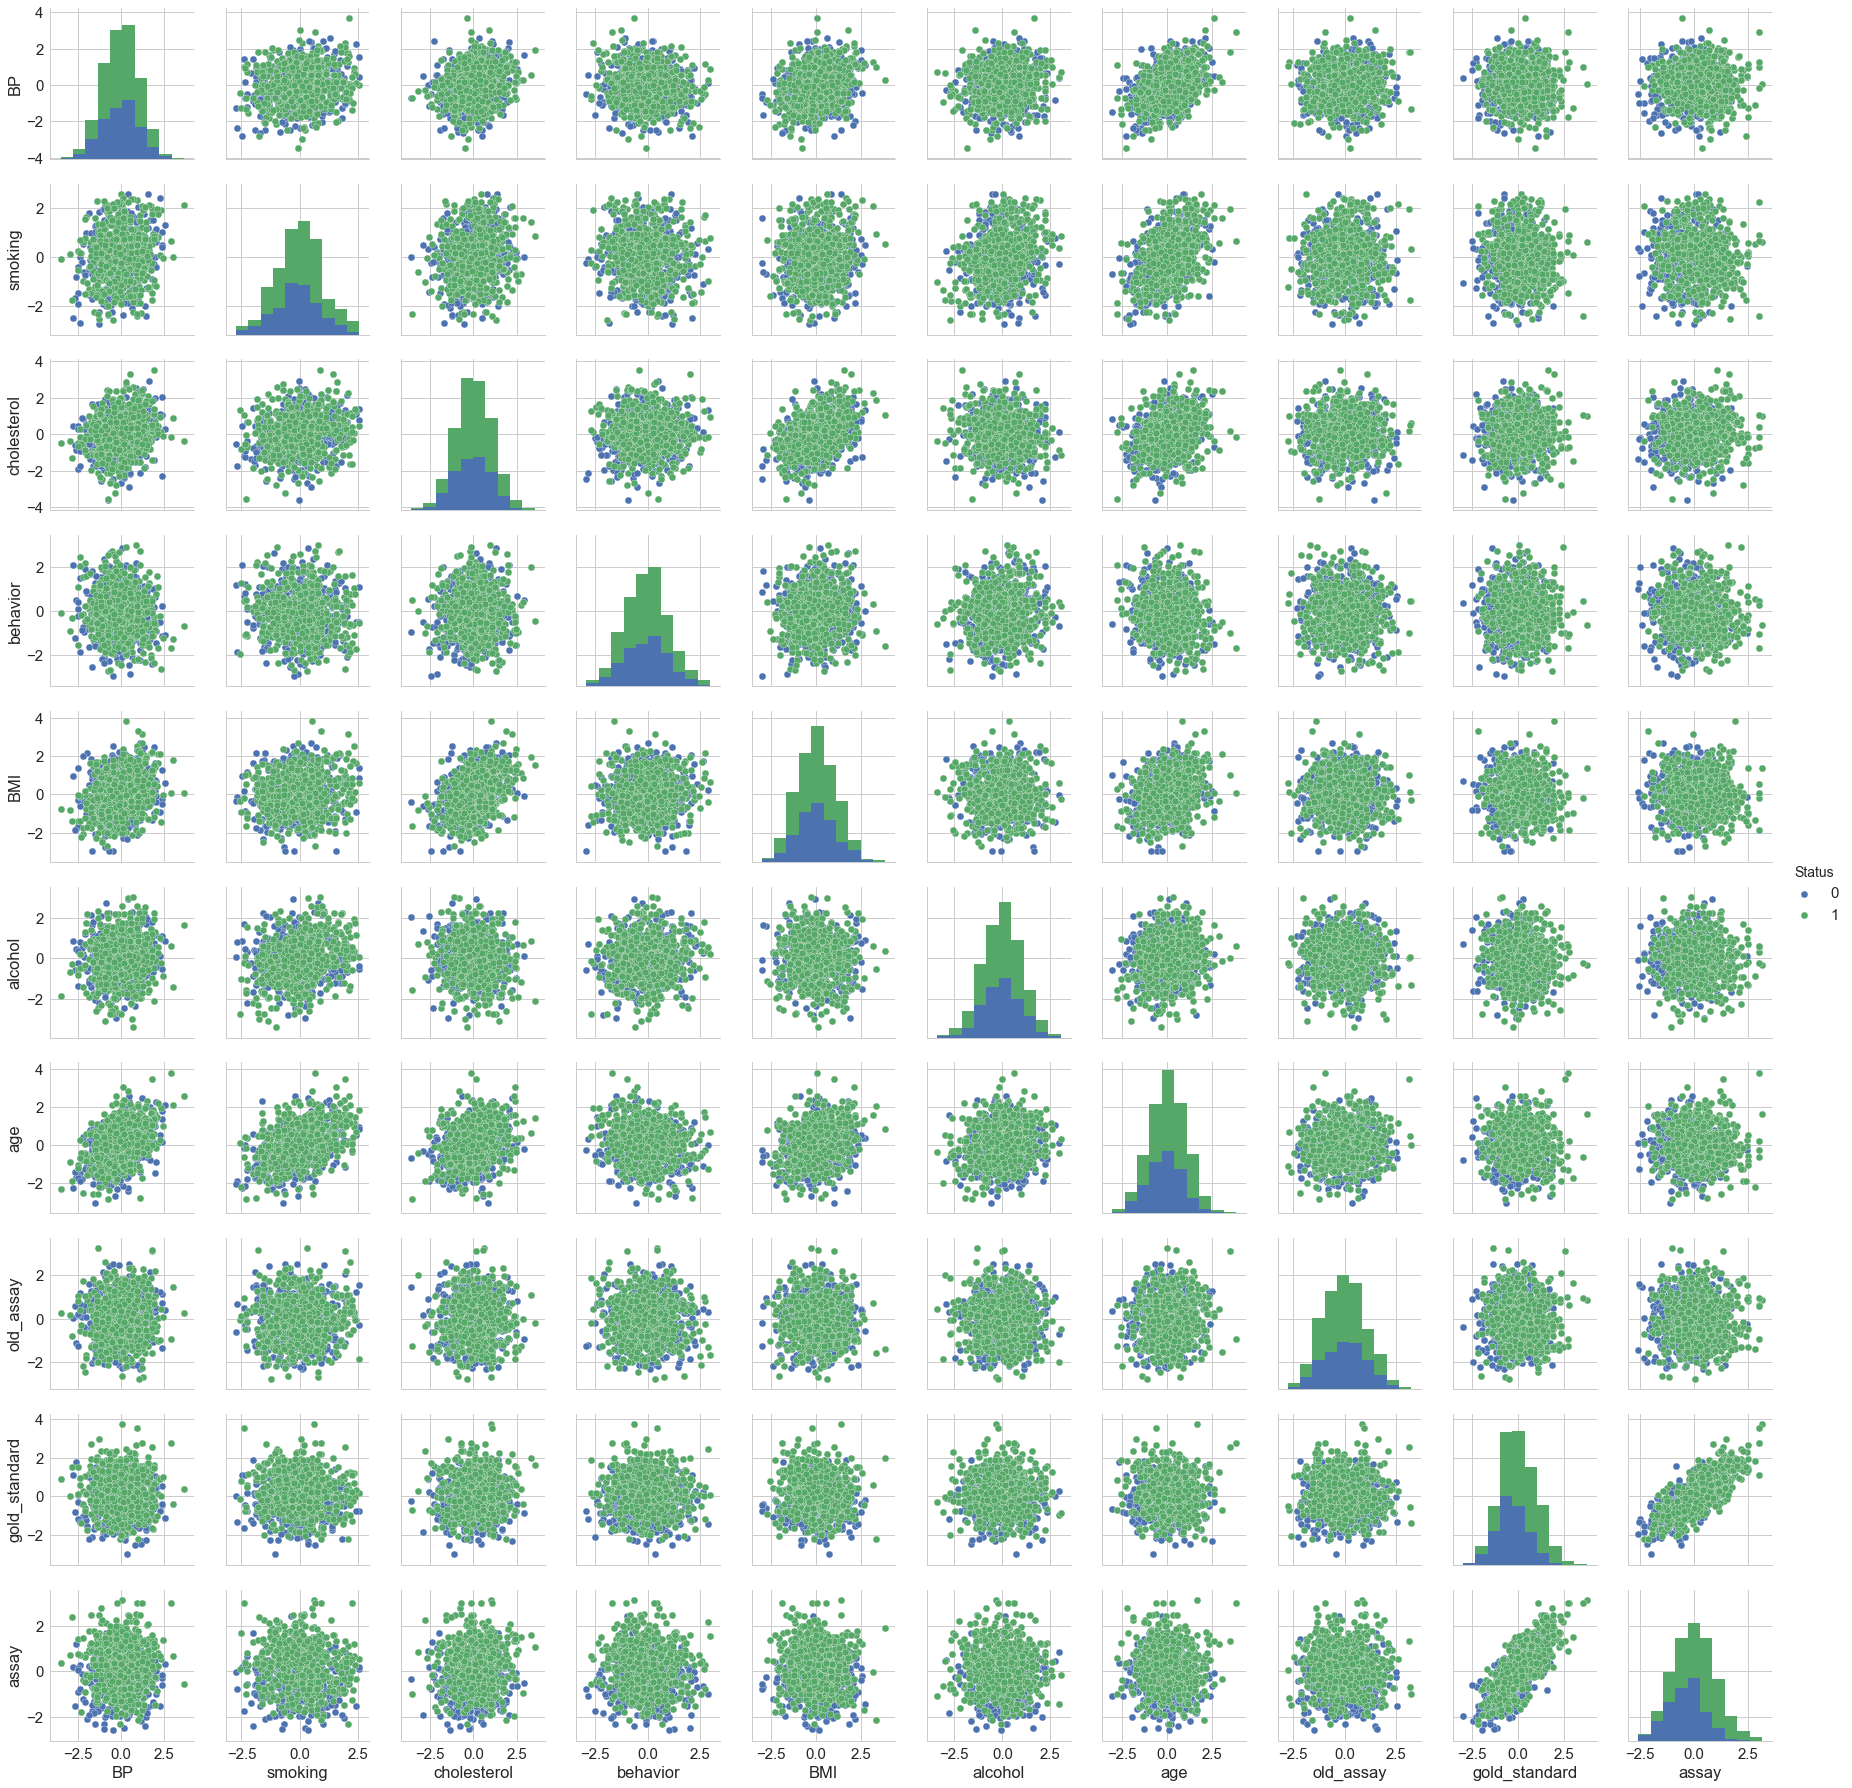

In [9]:
sns.pairplot(hd, vars = ['BP', 'smoking', 'cholesterol', 'behavior', 'BMI', 'alcohol', 'age',
       'old_assay', 'gold_standard', 'assay'], hue = 'Status')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(hd.data, hd.target, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.columns)
print(hd.data)

(600, 10) (600,) (400, 10) (400,)
Index(['BP', 'smoking', 'cholesterol', 'behavior', 'BMI', 'alcohol', 'age',
       'old_assay', 'gold_standard', 'assay'],
      dtype='object')
           BP   smoking  cholesterol  behavior       BMI   alcohol       age  \
0    0.944956  2.328666     1.231095 -1.097375  2.529036  1.958162  1.173864   
1    1.556429  1.182554    -0.161692 -1.226644 -0.286238  1.681164  0.549182   
2    0.631803 -0.372085    -0.649282  0.446255 -0.892680  0.767021 -0.034547   
3    1.084350  0.086160     0.722876  0.133330 -0.463105  1.115558 -0.518406   
4    0.722766 -0.738356     0.602725  0.576840  0.466670  1.407494 -0.304570   
5    0.661379  0.622986    -0.237895 -1.271525 -2.139964  0.299967  0.998296   
6    2.141582  0.811082     0.454789  1.104310  1.629965  0.553652  0.093531   
7   -0.330524 -0.610508    -3.194973  0.004082 -0.838131  0.691867 -0.405829   
8   -0.818292  1.362997    -1.835444 -0.741856  0.060553  1.035457 -0.075960   
9   -1.295453  0.4871

In [22]:
hd_test = pd.read_csv('data/test_data.csv') # heart disease
hd_test.info()
hd_test.data = hd_test.iloc[:,:10]
print(hd_test.data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
BP               200 non-null float64
smoking          200 non-null float64
cholesterol      200 non-null float64
behavior         200 non-null float64
BMI              200 non-null float64
alcohol          200 non-null float64
age              200 non-null float64
old_assay        200 non-null float64
gold_standard    200 non-null float64
assay            200 non-null float64
Id               200 non-null int64
dtypes: float64(10), int64(1)
memory usage: 17.3 KB
(200, 10)


D:\ProgramFiles\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X_train, y_train)
rf_accu = rf.score(X_test, y_test)
print("Accuracy:%.2f" % rf_accu)

# We are drastically reducing the size of our training data, better to do k-fold cross validation 
scores = cross_val_score(rf, hd.data, hd.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy:0.66
Accuracy: 0.66 (+/- 0.07)


In [75]:
rf.fit(hd.data, hd.target)
# hd_test = pd.read_csv('data/test_data.csv') # heart disease
# hd_test.info()
# hd_test.data = hd_test.iloc[:,:10]
hd_result_rf = rf.predict(hd_test.data).astype(bool)
# print(hd_result)

a = hd_test.iloc[:,10]
b = hd_result_rf.astype('str')
b = np.array([x.upper() for x in b])
print(b.shape)
print(b)

d2 = {'Id':pd.Series(a), 'Category': pd.Series(b)}
df2 = pd.DataFrame(d2)
# print(df2)
df2.to_csv('data/rf_prediction.csv', sep=',',index=False)

(200,)
['TRUE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'FALSE' 'FALSE' 'TRUE' 'FALSE'
 'FALSE' 'FALSE' 'FALSE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE'
 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE'
 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE'
 'FALSE' 'FALSE' 'FALSE' 'TRUE' 'FALSE' 'TRUE' 'FALSE' 'FALSE' 'FALSE'
 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE'
 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'FALSE'
 'TRUE' 'FALSE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE'
 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE'
 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE'
 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE' 'FALSE' 'TRUE' 'FALSE'
 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'FALSE' 'TRUE' 'TRUE' 'TRUE'
 'TRUE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE' 'TRUE'
 'FALSE' 'TRUE' 'TRUE' 'FALSE' 'TRUE' 'TRUE' '